<a href="https://colab.research.google.com/github/meblo98/AT1-2024/blob/main/Travail_1_Neural_game_of_life_trou%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Game Of Life

Comblez le code manquant pour compléter le Jeu de la vie.

La version finale doit être exécutable en 2 modes: standard et neuronale.

Ainsi, vous devez prévoir 2 fonctions "voisins", qui compte le nombre de voisins d'une cellule.

Dans le jeu de la vie, simplement changer la valeur de la variable "mode" pour passer d'un mode à l'autre.

MODE_STANDARD = 0

MODE_NEURAL = 1

**mode = MODE_STANDARD   # Ou MODE_NEURAL**

*Peut importe les points finaux, vous ne pouvez pas avoir une note supérieure à 9/15 si AUCUN de vos modes ne fonctionne bien.*




## RND - MLP

(7 points)

In [1]:
# Importation des bibliothèques
# Vos instructions ici...
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import random

In [2]:
# 1 POINT
# Initialisation du générateur de nombres aléatoires
# Doit assurer la reproductibilité
# Vos instructions ici...
random.seed(42)
np.random.seed(42)

In [4]:
# 1 POINT
# Générer 100 données avec 8 caractéristiques binaires et la caractéristique cible (somme des caractéristiques binaires)
# Vos instructions ici...
X = np.random.randint(0, 2, (100, 8))
y = X.sum(axis=1)

In [6]:
# 1 POINT
# Diviser les données en ensembles d'entraînement et de test (X_train, X_test, Y_train, Y_test)
# 80% pour l'entraînement et 20% pour les tests.
# Assurer la reproductibilité
# Vos instructions ici...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# 1 POINT
# Créer le modèle MLPRegressor nommé mlp, 1 couche cachée avec 8 neurones. Reproductible, Maximum 1000 itérations d'apprentissage.
# Vos instructions ici...
mlp = MLPRegressor(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)

In [8]:
# 1 POINT
# Entraîner le modèle sur les données d'entraînement
# Vos instructions ici...
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(8,), max_iter=1000, random_state=42)

In [9]:
# 1 POINT
# Faire des prédictions sur les données de test.
# Vos instructions ici...
y_pred = mlp.predict(X_test)

In [10]:
# 1 POINT
# Calculer et afficher l'erreur quadratique moyenne (MSE) et coefficient de détermination R^2 (le score)
# Vos instructions ici...
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE): {mse:.2f}")
print(f"Score R²: {r2:.2f}")

Erreur quadratique moyenne (MSE): 0.15
Score R²: 0.96


In [11]:
# Tester individuellement le model avec .predict.
# Le paramètre est un tableau 2 dimensions qui contient 1 ligne, et 8 caractéristiques valant 0 ou 1.
# Le résultat doit donner une bonne approximation du nombre de voisins.
print(mlp.predict([[0,0,0,0,0,0,0,0]]))
print(mlp.predict([[0,0,1,0,0,0,0,0]]))
print(mlp.predict([[0,0,0,1,0,1,0,0]]))
print(mlp.predict([[0,1,0,1,1,0,0,0]]))
print(mlp.predict([[1,0,1,0,1,0,1,0]]))
print(mlp.predict([[0,1,1,0,1,1,1,0]]))
print(mlp.predict([[1,1,0,1,1,1,0,1]]))
print(mlp.predict([[1,1,1,1,0,1,1,1]]))
print(mlp.predict([[1,1,1,1,1,1,1,1]]))

[0.77896423]
[1.41621958]
[2.47154611]
[3.33816919]
[4.08624798]
[5.07067318]
[5.64731837]
[6.46680555]
[7.42174997]


Ceci termine votre modèle de RDN - MLP. Assurez-vous qu'il soit fonctionnel avant de l'appeler dans le jeu de la vie.

## Jeu de la vie

(8 points)

In [12]:
# Importation des librairies.
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [13]:
# Déclaration des constantes
MORT = 0
VIVANT = 1
TAILLE = 100
NB_GENERATION = 60
MODE_STANDARD = 0
MODE_NEURAL = 1

# Assignez mode à MODE_STANDARD ou MODE_NEURAL, selon le mode d'exécution attendu.
mode = MODE_STANDARD

In [14]:
# 1 POINT
# Initialisation de toutes les cellules de la grille à des 0 ou des 1.
# Une seule instruction requise.
# Nommez la variable (un tableau 2d): grille
# Vos instructions ici...
from sklearn.neural_network import MLPRegressor
import joblib
grille = np.random.choice([MORT, VIVANT], size=(TAILLE, TAILLE))

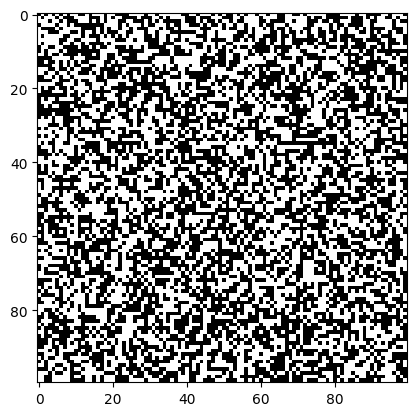

In [15]:
# Affiche le graphique
fig, ax = plt.subplots()
im = plt.imshow(grille, cmap='binary')

In [16]:
# 2 POINTS
# Foncion "voisin" qui compte et retourne le nombre de voisins.
# C'est la fonction appellée par le mode MODE_STANDARD.
# Elle recoit i,j la position de la cellule dans la grille ou il faut compter le nombre de voisin (VIVANT)

def voisin(i, j):
    nb_voisin = 0
    for x in range(i-1, i+2):
        for y in range(j-1, j+2):
            if x == i and y == j:
                continue
            if x >= 0 and x < TAILLE and y >= 0 and y < TAILLE:
                nb_voisin += grille[x, y]
    return nb_voisin

In [17]:
# 2 POINTS
# Foncion "voisin_mlp" qui compte et retourne le nombre de voisins, mais en mode MODE_NEURAL.
# Elle compte le nombre de voisin en faisant appel à la fonction mlp.predict() du modèle entraîné plus haut.
# Elle recoit i,j la position de la cellule dans la grille ou il faut compter le nombre de voisin (VIVANT)

def voisin_mlp(i, j):
    voisins = []
    for x in range(i-1, i+2):
        for y in range(j-1, j+2):
            if x == i and y == j:
                continue
            if x >= 0 and x < TAILLE and y >= 0 and y < TAILLE:
                voisins.append(grille[x, y])
            else:
                voisins.append(0)
    nb_voisin = mlp.predict([voisins])
    return int(round(nb_voisin[0]))

In [18]:
# 3 POINTS
# Calcul la génération de cellules suivante
def generation_suivante(old_grille):
    global grille
    nouvelle_grille = old_grille.copy()
    for i in range(TAILLE):
        for j in range(TAILLE):
            if mode == MODE_STANDARD:
                nb_voisin = voisin(i, j)
            else:
                nb_voisin = voisin_mlp(i, j)
            if old_grille[i, j] == VIVANT:
                if nb_voisin < 2 or nb_voisin > 3:
                    nouvelle_grille[i, j] = MORT
            else:
                if nb_voisin == 3:
                    nouvelle_grille[i, j] = VIVANT
    return nouvelle_grille

In [19]:
# Autres instructions importantes pour la mise à jour du tableau et la gestion de l'animation

# Fonction d'initialisation de l'animation
def init():
    im.set_data(grille)
    return [im]

# Fonction de la mise à jour de l'animation
def update(frames):
    global grille
    old_grille = im.get_array()
    grille = generation_suivante(old_grille)
    im.set_array(grille)
    return [im]


# Fonction d'animation
# np.linspace(debut, fin, num=nombre_de_division_dans_le_vecteur): Produit un vecteur sur le nombre de frame
ani = animation.FuncAnimation(fig, update, init_func=init, frames=np.linspace(0, NB_GENERATION, num=NB_GENERATION), interval=100)

plt.rcParams["animation.html"] = "jshtml"
ani
